In [1]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


train= pd.read_csv('C:/Users/roger/Documents/DMT/2/training_set_VU_DM_2014.csv')
test= pd.read_csv('C:/Users/roger/Documents/DMT/2/test_set_VU_DM_2014.csv')

In [ ]:
#haven't ereased them because maybe they might be usefull I don't know ¯\_(ツ)_/¯

In [6]:
#randomForestIntro
#X = [[ 4958347, 54], [1, 1]]
#Y = [4959183, 50]
#clf = RandomForestClassifier(n_estimators=10)
#clf = clf.fit(X, Y)

In [ ]:
#X = train.drop(['booking_bool', 'date_time', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff','comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff','comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff','comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff','comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'  ], axis=1)
#X = X.fillna(train.mean())
#Y = train['booking_bool']

In [ ]:
#decision treea
#X, y = make_blobs(n_samples=4958347, n_features=54, centers=90000, random_state=0) 
#clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
#scores = cross_val_score(clf, X, Y)
#scores.mean()
#X = X.sample(frac=0.1, replace=True)
#Y = X['booking_bool']

In [43]:
#sampling attempt
#train = train.drop(['booking_bool', 'date_time', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff','comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff','comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff','comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff','comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'  ], axis=1)
#train = train.sample(frac=0.1, replace=True)


In [ ]:
#clf = ExtraTreesClassifier(n_estimators=64, max_depth=None,min_samples_split=2, random_state=-1)
#scores = cross_val_score(clf, X, y)

In [2]:
#EVERYBODY CALM THE FUCK DOWN
sample = train.sample(frac=0.1, replace=True) #sampling

In [4]:
c.value_counts() 

0    482053
1     13782
Name: booking_bool, dtype: int64

In [3]:
a=sample.drop(['srch_id','booking_bool', 'date_time', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff','comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff','comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff','comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff','comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'  ], axis=1)
b=a.mean()
a = a.fillna(a.mean())
c = sample['booking_bool']
X = a
Y = c


In [ ]:
#defining our pretty variables 
#X = sample.drop(['booking_bool', 'date_time', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff','comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff','comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff','comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff','comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'  ], axis=1)
#X = X.fillna(sample.mean())
#Y = sample['booking_bool']

In [47]:
#X.max()

In [48]:
#tree
#clf = ExtraTreesClassifier(n_estimators=64, max_depth=None,min_samples_split=2, random_state=-1)

In [49]:
#scores
#scores = cross_val_score(clf, X, Y)

In [11]:
#k,k let's try this
#tree that we will use 
import numpy as np

#forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest = ExtraTreesClassifier(n_estimators=64, max_depth=None,min_samples_split=2)
forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

#being extra
l=X.columns

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(l[f] , (f + 1, indices[f], importances[indices[f]]))
    
#so in (importance rank, feature indice, importance score(gonna better formulate this one))

Feature ranking:
site_id (1, 24, 0.66370327220281233)
visitor_location_country_id (2, 25, 0.10740742184914839)
visitor_hist_starrating (3, 23, 0.092346932956416689)
visitor_hist_adr_usd (4, 12, 0.016603209037174008)
prop_country_id (5, 16, 0.010479460973676883)
prop_id (6, 13, 0.0093230086336269277)
prop_starrating (7, 17, 0.0085892986460641297)
prop_review_score (8, 10, 0.0084776157555556814)
prop_brand_bool (9, 9, 0.0080053678967248083)
prop_location_score1 (10, 11, 0.007568072164443186)
prop_location_score2 (11, 5, 0.0075583041354651834)
prop_log_historical_price (12, 15, 0.0074275540244950347)
position (13, 7, 0.0064568925788829916)
price_usd (14, 6, 0.0054589123582939386)
promotion_flag (15, 18, 0.0054353778610288306)
srch_destination_id (16, 1, 0.0051325689048928366)
srch_length_of_stay (17, 4, 0.005117558590871059)
srch_booking_window (18, 0, 0.0047956950460915438)
srch_adults_count (19, 19, 0.0043297808838474857)
srch_children_count (20, 21, 0.0030517914451827235)
srch_room_cou

In [28]:
#getting comfy with columns and stuff 
l=X.columns
l[25]

#Daniel magic that didn't worked
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print(X[indices[f]])

'gross_bookings_usd'

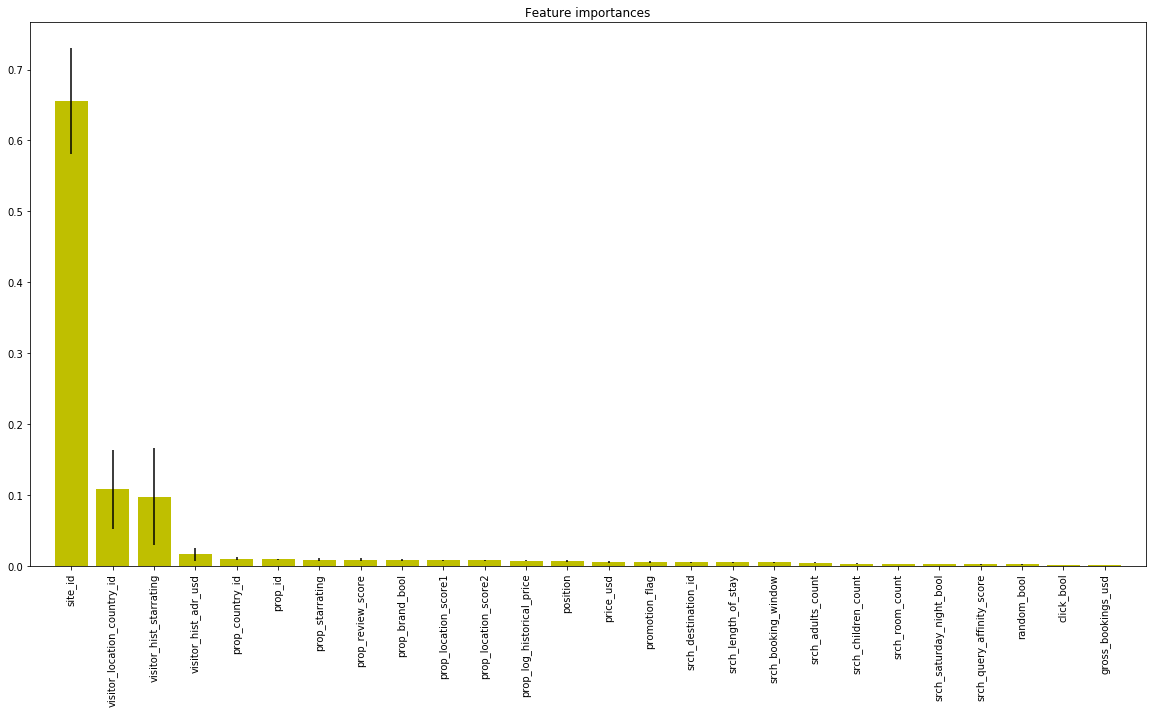

In [9]:
#tree ploting with this 

import matplotlib.pyplot as plt
#feature_names = x_dummies.columns
feature_names=X.columns

plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="y", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names)
plt.xticks(rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [31]:
X.shape

(495835, 26)

In [4]:
#the whole thing
#a=sample.drop(['srch_id','booking_bool', 'date_time', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff','comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff','comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff','comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff','comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'  ], axis=1)
#b=a.mean()
#a = a.fillna(a.mean())
#c = sample['booking_bool']
#X = a
#Y = c

Y = train['booking_bool']
train = train.drop(['srch_id','booking_bool', 'date_time', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff','comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff','comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff','comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff','comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff','comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff','comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'  ], axis=1)
train = train.fillna(train.mean())
X = train

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

#being extra
l=X.columns

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print(l[f])


KeyboardInterrupt: 

In [83]:
#aimin a little high now:
training= pd.read_csv('C:/Users/roger/Documents/DMT/2/training_set_VU_DM_2014.csv')
testing= pd.read_csv('C:/Users/roger/Documents/DMT/2/test_set_VU_DM_2014.csv')

In [84]:
training.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [91]:
B = training['booking_bool']
A = training.drop(['booking_bool', 'date_time'], axis=1)
A = A.fillna(A.mean())

In [92]:
B.value_counts()

0    4819957
1     138390
Name: booking_bool, dtype: int64

In [93]:
#we can play with extra tree here 
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(A, B)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

#being extra
l=A.columns

# Print the feature ranking
print("Feature ranking:")

for f in range(A.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print(l[f])

Feature ranking:
1. feature 50 (0.663630)
srch_id
2. feature 51 (0.096252)
site_id
3. feature 25 (0.090844)
visitor_location_country_id
4. feature 13 (0.016314)
visitor_hist_starrating
5. feature 17 (0.007979)
visitor_hist_adr_usd
6. feature 14 (0.006993)
prop_country_id
7. feature 11 (0.006827)
prop_id
8. feature 18 (0.006732)
prop_starrating
9. feature 10 (0.006061)
prop_review_score
10. feature 12 (0.005704)
prop_brand_bool
11. feature 0 (0.005641)
prop_location_score1
12. feature 16 (0.005474)
prop_location_score2
13. feature 6 (0.005468)
prop_log_historical_price
14. feature 24 (0.005140)
position
15. feature 8 (0.004763)
price_usd
16. feature 19 (0.004029)
promotion_flag
17. feature 7 (0.003899)
srch_destination_id
18. feature 1 (0.003371)
srch_length_of_stay
19. feature 2 (0.003368)
srch_booking_window
20. feature 5 (0.003351)
srch_adults_count
21. feature 20 (0.003170)
srch_children_count
22. feature 38 (0.002606)
srch_room_count
23. feature 39 (0.002545)
srch_saturday_night_bo

In [1]:
feature_names=A.columns

plt.figure()
plt.title("Feature importances")
plt.bar(range(A.shape[1]), importances[indices],
       color="y", yerr=std[indices], align="center")
plt.xticks(range(A.shape[1]), feature_names)
plt.xticks(rotation=90)
plt.xlim([-1, A.shape[1]])
plt.show()

NameError: name 'A' is not defined